In [77]:
import gc
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
from minepy import MINE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import KFold
from hyperopt import STATUS_OK, tpe, hp, Trials, fmin
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train_all_features = pd.read_csv('./new_features/X_train_all_features.csv')
X_train_new_features = pd.read_csv('./new_features/X_train_new_features.csv')
X_test_all_features = pd.read_csv('./new_features/X_test_all_features.csv', index_col='seg_id')
X_test_new_features = pd.read_csv('./new_features/X_test_new_features.csv', index_col='seg_id')
y = pd.read_csv('./new_features/y.csv')

In [3]:
drop_columns = ['classic_sta_lta5_mean', 'classic_sta_lta7_mean', 'den_mean_change_rate_first_10000', 'den_mean_change_rate_last_10000']
X_train_all_features.drop(drop_columns, axis=1, inplace=True)
X_test_all_features.drop(drop_columns, axis=1, inplace=True)

In [4]:
X = pd.DataFrame(pd.concat([X_train_all_features, X_train_new_features], axis=1))
X_test = pd.DataFrame(pd.concat([X_test_all_features, X_test_new_features], axis=1))

In [5]:
X.shape

(4195, 1299)

In [6]:
X_test

,mean,std,max,min,mean_change_abs,mean_change_rate,abs_max,mean_first_50000,mean_last_50000,mean_first_10000,...,MA_700MA_BB_high_mean_9,MA_700MA_BB_low_mean_9,MA_400MA_std_mean_9,MA_400MA_BB_high_mean_9,MA_400MA_BB_low_mean_9,MA_1000MA_std_mean_9,iqr_9,q999_9,q001_9,ave10_9
seg_id,,,,,,,,,,,,,,,,,,,,,
seg_00030f,4.491780,4.893690,115.0,-75.0,0.000027,75044.983541,115.0,4.46644,4.49598,4.3842,...,4.004239,-4.004239,2.002314,4.004629,-4.004629,2.002027,2.698087,6.211311,-6.258733,-0.000632
seg_0012b5,4.171153,5.922839,152.0,-140.0,-0.000013,74949.685653,152.0,4.01786,4.24444,4.0635,...,4.011674,-4.011674,2.005447,4.010894,-4.010894,2.006163,2.696517,6.278556,-6.302028,-0.000759
seg_00184e,4.610260,6.946990,248.0,-193.0,-0.000020,74997.632054,248.0,4.55518,4.55380,4.2452,...,4.028395,-4.028395,2.014106,4.028211,-4.028211,2.014495,2.720089,6.304279,-6.274641,-0.002937
seg_003339,4.531473,4.114147,85.0,-93.0,0.000047,74997.954642,93.0,4.49052,4.48922,4.3834,...,3.986394,-3.986394,1.993212,3.986424,-3.986424,1.993194,2.677483,6.179593,-6.213242,-0.001001
seg_0042cc,4.128340,5.797164,177.0,-147.0,-0.000007,75075.108147,177.0,4.23020,4.10524,4.4902,...,3.989340,-3.989340,1.994490,3.988980,-3.988980,1.994819,2.675931,6.250094,-6.236563,-0.001628
seg_004314,4.148607,24.782769,671.0,-675.0,-0.000027,74764.387143,675.0,4.10356,4.25568,4.2719,...,4.277441,-4.277442,2.135009,4.270018,-4.270018,2.142190,2.811499,8.956030,-8.794509,-0.000954
seg_004cd2,4.113987,4.707150,125.0,-107.0,0.000033,74849.551868,125.0,4.12518,4.18020,3.8994,...,3.994099,-3.994099,1.997207,3.994414,-3.994414,1.997098,2.684729,6.147676,-6.228035,0.001731
seg_004ee5,4.328380,5.964443,120.0,-120.0,0.000000,75024.647249,120.0,4.23002,4.55402,4.3388,...,4.007896,-4.007896,2.003874,4.007749,-4.007749,2.003950,2.682721,6.249864,-6.250502,0.000415
seg_004f1f,4.000733,5.874469,118.0,-114.0,0.000007,75012.913166,118.0,3.98250,4.01954,3.9839,...,4.005308,-4.005308,2.002319,4.004638,-4.004638,2.002970,2.690306,6.277496,-6.298202,0.001615


In [7]:
varth = VarianceThreshold()
varth = varth.fit(X)
X = varth.transform(X)
X_test = varth.transform(X_test)

In [8]:
skb = SelectKBest(lambda X,Y:np.array(list(map(lambda x:pearsonr(x,Y.reshape(-1)),X.T))).T[0], k=1000)
skb = skb.fit(X, y)
X = skb.transform(X)
X_test = skb.transform(X_test)

In [9]:
def mic(x, y):
    m = MINE()
    m.compute_score(x, y.reshape(-1))
    return (m.mic(), 0.5)

skb1 = SelectKBest(lambda X, Y: np.array(list(map(lambda x:mic(x, Y.reshape(-1)), X.T))).T[0], k=750)
skb1 = skb1.fit(X, y)
X = skb1.transform(X)
X_test = skb1.transform(X_test)

In [10]:
skb1.get_support(indices=True)

array([  0,   1,   2,   3,   5,   6,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  25,  26,  27,  28,  31,  32,  33,
        34,  36,  37,  38,  39,  45,  46,  47,  48,  50,  51,  54,  55,
        57,  58,  59,  60,  61,  63,  64,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100, 101,
       103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 116, 117,
       118, 119, 120, 122, 123, 125, 126, 127, 128, 130, 131, 132, 133,
       134, 139, 140, 141, 142, 143, 145, 146, 147, 153, 154, 155, 156,
       160, 167, 168, 169, 170, 174, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228,
       229, 231, 234, 235, 238, 239, 240, 241, 242, 243, 244, 24

In [11]:
estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=500, step=25, verbose=10000)
selector = selector.fit(X, y.values.reshape(-1))

Fitting estimator with 750 features.
Fitting estimator with 725 features.
Fitting estimator with 700 features.
Fitting estimator with 675 features.
Fitting estimator with 650 features.
Fitting estimator with 625 features.
Fitting estimator with 600 features.
Fitting estimator with 575 features.
Fitting estimator with 550 features.
Fitting estimator with 525 features.


In [12]:
X = selector.transform(X)
X_test = selector.transform(X_test)

In [67]:
NUM_EVALS = 1000
N_FOLDS = 5
XGB_MAX_LEAVES = 2**12 
XGB_MAX_DEPTH = 50
EVAL_METRIC_XGB_REG = 'mae'
LGBM_MAX_LEAVES = 2**11
LGBM_MAX_DEPTH = 35
EVAL_METRIC_LGBM_REG = 'mae'

In [68]:
def quick_hyperopt(data, labels, package='lgbm', num_evals=NUM_EVALS, diagnostic=False):
    
    #==========
    #LightGBM
    #==========
    
    if package=='lgbm':
        
        print('Running {} rounds of LightGBM parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth',
                          'num_leaves',
                          'max_bin',
                          'min_data_in_leaf',
                          'min_data_in_bin']
        
        def objective(space_params):
            
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
            
            #extract nested conditional parameters
            if space_params['boosting']['boosting'] == 'goss':
                top_rate = space_params['boosting'].get('top_rate')
                other_rate = space_params['boosting'].get('other_rate')
                #0 <= top_rate + other_rate <= 1
                top_rate = max(top_rate, 0)
                top_rate = min(top_rate, 0.5)
                other_rate = max(other_rate, 0)
                other_rate = min(other_rate, 0.5)
                space_params['top_rate'] = top_rate
                space_params['other_rate'] = other_rate
            
            subsample = space_params['boosting'].get('subsample', 1.0)
            space_params['boosting'] = space_params['boosting']['boosting']
            space_params['subsample'] = subsample
            
            #for classification, set stratified=True and metrics=EVAL_METRIC_LGBM_CLASS
            cv_results = lgb.cv(space_params, train, num_boost_round=100, nfold = N_FOLDS, stratified=False,
                                early_stopping_rounds=100, metrics=EVAL_METRIC_LGBM_REG, seed=42)
            
            best_loss = cv_results['l1-mean'][-1] #'l2-mean' for rmse
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['auc-mean'][-1]
            #if necessary, replace 'auc-mean' with '[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = lgb.Dataset(data, labels)
                
        #integer and string parameters, used with hp.choice()
        boosting_list = [{'boosting': 'gbdt',
                          'subsample': hp.uniform('subsample', 0.5, 1)},
                         {'boosting': 'goss',
                          'subsample': 1.0,
                         'top_rate': hp.uniform('top_rate', 0, 0.5),
                         'other_rate': hp.uniform('other_rate', 0, 0.5)}] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['MAE'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc'] #modify as required for other classification metrics
        objective_list_reg = ['huber',  'gamma', 'tweedie', 'fair']
        objective_list_class = ['binary', 'cross_entropy']
        #for classification set objective_list = objective_list_class
        objective_list = objective_list_reg

        space ={'boosting' : hp.choice('boosting', boosting_list),
                'num_leaves' : hp.quniform('num_leaves', 2, LGBM_MAX_LEAVES, 1),
                'max_depth': hp.quniform('max_depth', 2, LGBM_MAX_DEPTH, 1),
                'max_bin': hp.quniform('max_bin', 32, 255, 1),
                'min_data_in_leaf': hp.quniform('min_data_in_leaf', 1, 256, 1),
                'min_data_in_bin': hp.quniform('min_data_in_bin', 1, 256, 1),
                'min_gain_to_split' : hp.quniform('min_gain_to_split', 0.1, 5, 0.01),
                'lambda_l1' : hp.uniform('lambda_l1', 0, 5),
                'lambda_l2' : hp.uniform('lambda_l2', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'metric' : hp.choice('metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'feature_fraction' : hp.quniform('feature_fraction', 0.5, 1, 0.01),
                'bagging_fraction' : hp.quniform('bagging_fraction', 0.5, 1, 0.01)
            }
        
        #optional: activate GPU for LightGBM
        #follow compilation steps here:
        #https://www.kaggle.com/vinhnguyen/gpu-acceleration-for-lightgbm/
        #then uncomment lines below:
        #space['device'] = 'gpu'
        #space['gpu_platform_id'] = 0,
        #space['gpu_device_id'] =  0

        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
                
        #fmin() will return the index of values chosen from the lists/arrays in 'space'
        #to obtain actual values, index values are used to subset the original lists/arrays
        best['boosting'] = boosting_list[best['boosting']]['boosting']#nested dict, index twice
        best['metric'] = metric_list[best['metric']]
        best['objective'] = objective_list[best['objective']]
                
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #XGBoost
    #==========
    
    if package=='xgb':
        
        print('Running {} rounds of XGBoost parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth']
        
        def objective(space_params):
            
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract multiple nested tree_method conditional parameters
            #libera te tutemet ex inferis
            if space_params['tree_method']['tree_method'] == 'hist':
                max_bin = space_params['tree_method'].get('max_bin')
                space_params['max_bin'] = int(max_bin)
                if space_params['tree_method']['grow_policy']['grow_policy']['grow_policy'] == 'depthwise':
                    grow_policy = space_params['tree_method'].get('grow_policy').get('grow_policy').get('grow_policy')
                    space_params['grow_policy'] = grow_policy
                    space_params['tree_method'] = 'hist'
                else:
                    max_leaves = space_params['tree_method']['grow_policy']['grow_policy'].get('max_leaves')
                    space_params['grow_policy'] = 'lossguide'
                    space_params['max_leaves'] = int(max_leaves)
                    space_params['tree_method'] = 'hist'
            else:
                space_params['tree_method'] = space_params['tree_method'].get('tree_method')
                
            #for classification replace EVAL_METRIC_XGB_REG with EVAL_METRIC_XGB_CLASS
            cv_results = xgb.cv(space_params, train, num_boost_round=100, nfold=N_FOLDS, metrics=[EVAL_METRIC_XGB_REG],
                             early_stopping_rounds=100, stratified=False, seed=42)
            
            best_loss = cv_results['test-mae-mean'].iloc[-1] #or 'test-rmse-mean' if using RMSE
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['test-auc-mean'].iloc[-1]
            #if necessary, replace 'test-auc-mean' with 'test-[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = xgb.DMatrix(data, labels)
        
        #integer and string parameters, used with hp.choice()
        boosting_list = ['gbtree', 'gblinear'] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['mae'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc']
        #modify as required for other classification metrics classification
        
        tree_method = [{'tree_method' : 'exact'},
               {'tree_method' : 'approx'},
               {'tree_method' : 'hist',
                'max_bin': hp.quniform('max_bin', 2**3, 2**7, 1),
                'grow_policy' : {'grow_policy': {'grow_policy':'depthwise'},
                                'grow_policy' : {'grow_policy':'lossguide',
                                                  'max_leaves': hp.quniform('max_leaves', 32, XGB_MAX_LEAVES, 1)}}}]
        
        #if using GPU, replace 'exact' with 'gpu_exact' and 'hist' with
        #'gpu_hist' in the nested dictionary above
        
        objective_list_reg = ['reg:linear']
        objective_list_class = ['reg:logistic', 'binary:logistic']
        #for classification change line below to 'objective_list = objective_list_class'
        objective_list = objective_list_reg
        
        space ={'boosting' : hp.choice('boosting', boosting_list),
                'tree_method' : hp.choice('tree_method', tree_method),
                'max_depth': hp.quniform('max_depth', 2, XGB_MAX_DEPTH, 1),
                'reg_alpha' : hp.uniform('reg_alpha', 0, 5),
                'reg_lambda' : hp.uniform('reg_lambda', 0, 5),
                'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
                'gamma' : hp.uniform('gamma', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'eval_metric' : hp.choice('eval_metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.01),
                'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1, 0.01),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),
                'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
                'nthread' : 3
            }
        
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        best['tree_method'] = tree_method[best['tree_method']]['tree_method']
        best['boosting'] = boosting_list[best['boosting']]
        best['eval_metric'] = metric_list[best['eval_metric']]
        best['objective'] = objective_list[best['objective']]
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        if 'max_bin' in best:
            best['max_bin'] = int(best['max_bin'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)

In [15]:
lgb_params = quick_hyperopt(X, y, package='lgbm', num_evals=1000)

Running 1000 rounds of LightGBM parameter optimisation:
100%|█| 1000/1000 [39:13<00:00,  2.71s/it, best loss: 2.048084657283357]
{bagging_fraction: 0.96
boosting: gbdt
feature_fraction: 0.8
lambda_l1: 0.9252078805471148
lambda_l2: 4.988177400179875
learning_rate: 0.10660836861492433
max_bin: 181
max_depth: 31
metric: MAE
min_data_in_bin: 82
min_data_in_leaf: 155
min_gain_to_split: 0.38
num_leaves: 12
objective: fair
subsample: 0.9263504643224827}


In [31]:
lgb_params = {'bagging_fraction': 0.96,
             'boosting': 'gbdt',
             'feature_fraction': 0.8,
             'lambda_l1': 0.9252078805471148,
             'lambda_l2': 4.988177400179875,
             'learning_rate': 0.10660836861492433,
             'max_bin': 181,
             'max_depth': 31,
             'metric': 'MAE',
             'min_data_in_bin': 82,
             'min_data_in_leaf': 155,
             'min_gain_to_split': 0.38,
             'num_leaves': 12,
             'objective': 'fair',
             'subsample': 0.9263504643224827}
# best loss: 2.048084657283357

In [ ]:
# lgb_params = {'bagging_fraction': 0.92,
#              'boosting': 'gbdt',
#              'feature_fraction': 0.8200000000000001,
#              'lambda_l1': 0.8584654944729962,
#              'lambda_l2': 4.805966245682638,
#              'learning_rate': 0.12832094635552588,
#              'max_bin': 239,
#              'max_depth': 3,
#              'metric': 'MAE',
#              'min_data_in_bin': 138,
#              'min_data_in_leaf': 6,
#              'min_gain_to_split': 0.54,
#              'num_leaves': 1920,
#              'objective': 'fair',
#              'subsample': 0.8959722287964866}

# 2000 evals

In [32]:
X = pd.DataFrame(X)
X_test = pd.DataFrame(X_test)

MAE = 0
lgb_preds = np.zeros(len(X_test))
oof_lgb = np.zeros(len(X))
scores = []

n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(y)):
#     print(train_idx)
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    model = lgb.LGBMRegressor(**lgb_params, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=1000)
    val_preds = model.predict(X_valid)
    oof_lgb[valid_idx] = val_preds
    MAE += mean_absolute_error(y_valid, val_preds) / n_fold
    lgb_preds += model.predict(X_test, num_iteration=model.best_iteration_) / n_fold
    scores.append(mean_absolute_error(y_valid, val_preds))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[29]	training's l1: 1.85406	valid_1's l1: 2.15965
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[29]	training's l1: 1.85699	valid_1's l1: 2.07343
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[53]	training's l1: 1.72689	valid_1's l1: 2.0732
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[69]	training's l1: 1.6636	valid_1's l1: 2.05608
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[24]	training's l1: 1.89448	valid_1's l1: 2.07838
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[81]	training's l1: 1.60105	valid_1's l1: 2.15127
Training until validation scores don't improve for 1000 rounds.
Early stopping, best iteration is:
[30]	trai

In [18]:
xgb_params = quick_hyperopt(X, y, package='xgb', num_evals=1000, diagnostic=False)

Running 1000 rounds of XGBoost parameter optimisation:
100%|█| 1000/1000 [11:12:40<00:00, 27.61s/it, best loss: 2.0474384]          
{boosting: gbtree
colsample_bylevel: 0.89
colsample_bynode: 0.75
colsample_bytree: 0.53
eval_metric: mae
gamma: 1.476398164142147
learning_rate: 0.029223584160393747
max_depth: 5
min_child_weight: 2.3208659431743595
objective: reg:linear
reg_alpha: 1.9391992481533822
reg_lambda: 3.254230618577096
subsample: 0.9500000000000001
tree_method: approx}


In [19]:
xgb_params = {'boosting': 'gbtree',
             'colsample_bylevel': 0.89,
             'colsample_bynode': 0.75,
             'colsample_bytree': 0.53,
             'eval_metric': 'mae',
             'gamma': 1.476398164142147,
             'learning_rate': 0.029223584160393747,
             'max_depth': 5,
             'min_child_weight': 2.3208659431743595,
             'objective': 'reg:linear',
             'reg_alpha': 1.9391992481533822,
             'reg_lambda': 3.254230618577096,
             'subsample': 0.9500000000000001,
             'tree_method': 'approx'}

{'boosting': 'gbtree',
 'colsample_bylevel': 0.89,
 'colsample_bynode': 0.75,
 'colsample_bytree': 0.53,
 'eval_metric': 'mae',
 'gamma': 1.476398164142147,
 'learning_rate': 0.029223584160393747,
 'max_depth': 5,
 'min_child_weight': 2.3208659431743595,
 'objective': 'reg:linear',
 'reg_alpha': 1.9391992481533822,
 'reg_lambda': 3.254230618577096,
 'subsample': 0.9500000000000001,
 'tree_method': 'approx'}

In [20]:
X = pd.DataFrame(X)
X_test = pd.DataFrame(X_test)

MAE = 0
xgb_preds = np.zeros(len(X_test))
oof_xgb = np.zeros(len(X))
scores = []

n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(y)):
#     print(train_idx)
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    model = xgb.XGBRegressor(**xgb_params, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=200)
    val_preds = model.predict(X_valid)
    oof_xgb[valid_idx] = val_preds
    MAE += mean_absolute_error(y_valid, val_preds) / n_fold
    xgb_preds += model.predict(X_test) / n_fold
    scores.append(mean_absolute_error(y_valid, val_preds))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

[0]	validation_0-mae:5.08194	validation_1-mae:4.948
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[96]	validation_0-mae:1.70156	validation_1-mae:2.13884

[0]	validation_0-mae:5.0541	validation_1-mae:5.20154
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[100]	validation_0-mae:1.7039	validation_1-mae:2.03536

[0]	validation_0-mae:5.05383	validation_1-mae:5.19549
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[122]	validation_0-mae:1.63862	validation_1-mae:2.11431

[0]	validation_0-mae:5.05175	validation_1-mae:5.22263
Multiple eval metrics have been passed: 'validation_1-mae' will be

In [21]:
submission = pd.read_csv('D:/kaggle/earthquake/sample_submission.csv', index_col='seg_id')
submission.time_to_failure = xgb_preds
submission.to_csv('./new_features/test_xgb_500features_filter_1000.csv', index=True)

In [23]:
pd.DataFrame(oof_xgb).to_csv('./new_features/train_xgb_500features_filter_1000.csv')

In [ ]:
rf_params1 = {'n_estimators': range(600, 1001, 100)}
gsearch1 = GridSearchCV(RandomForestRegressor(random_state=10),
                        param_grid=rf_params1, scoring='neg_mean_absolute_error', 
                        iid=False, cv=5, verbose=10, n_jobs=3)

gsearch1.fit(X, y.values)
gsearch1.best_params_, gsearch1.best_score_
# n_estimators: 245
# score: 0.13540396543180816

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  9.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 28.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 43.1min


In [33]:
oof_lgb2 = pd.read_csv('./features_for_stacking/train_lgb_400features_filter_1000.csv')
oof_lgb2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
oof_xgb1 = pd.read_csv('./features_for_stacking/train_xgb_400features_filter_2000.csv')
oof_xgb1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [35]:
oof_xgb2 = pd.read_csv('./features_for_stacking/train_xgb_500features_filter_1000.csv')
oof_xgb2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
lgb_preds2 = pd.read_csv('./features_for_stacking/test_lgb_400features_filter_1000.csv', index_col='seg_id')

In [37]:
xgb_preds1 = pd.read_csv('./features_for_stacking/test_xgb_400features_filter_2000.csv', index_col='seg_id')
xgb_preds2 = pd.read_csv('./features_for_stacking/test_xgb_500features_filter_1000.csv', index_col='seg_id')

In [52]:
oof_lgb.shape

(4195,)

In [53]:
oof_lgb2.shape

(4195,)

In [55]:
oof_xgb1 = oof_xgb1.values.reshape((4195,))

In [56]:
oof_xgb2 = oof_xgb2.values.reshape((4195,))

In [58]:
lgb_preds.shape

(2624,)

In [60]:
lgb_preds2 = lgb_preds2.values.reshape((2624,))

In [62]:
xgb_preds1 = xgb_preds1.values.reshape((2624,))
xgb_preds2 = xgb_preds2.values.reshape((2624,))

In [63]:
stack_list = [oof_lgb, oof_lgb2, oof_xgb1, oof_xgb2]
pred_list = [lgb_preds, lgb_preds2, xgb_preds1, xgb_preds2]
columns = ['lgb_500', 'lgb_400', 'xgb_400', 'xgb_500']
train_stack = pd.DataFrame(np.vstack(stack_list).transpose(), columns=columns)
test_stack = pd.DataFrame(np.vstack(pred_list).transpose(), columns=columns)

In [69]:
train_stack.shape

(4195, 4)

In [70]:
y.shape

(4195, 1)

In [72]:
xgb_params2 = quick_hyperopt(train_stack, y, 'xgb', 1000, diagnostic=False)

Running 1000 rounds of XGBoost parameter optimisation:
100%|█| 1000/1000 [33:48<00:00,  1.15s/it, best loss: 2.0338562000000002]
{boosting: gblinear
colsample_bylevel: 0.41000000000000003
colsample_bynode: 0.68
colsample_bytree: 0.85
eval_metric: mae
gamma: 1.447291666818534
learning_rate: 0.026825736294851632
max_bin: 49
max_depth: 5
max_leaves: 732
min_child_weight: 3.9062730418338356
objective: reg:linear
reg_alpha: 3.979471400765558
reg_lambda: 3.7374501932127293
subsample: 0.9500000000000001
tree_method: hist}


In [73]:
xgb_params2 = {'boosting': 'gblinear',
                 'colsample_bylevel': 0.41000000000000003,
                 'colsample_bynode': 0.68,
                 'colsample_bytree': 0.85,
                 'eval_metric': 'mae',
                 'gamma': 1.447291666818534,
                 'learning_rate': 0.026825736294851632,
                 'max_bin': 49,
                 'max_depth': 5,
                 'max_leaves': 732,
                 'min_child_weight': 3.9062730418338356,
                 'objective': 'reg:linear',
                 'reg_alpha': 3.979471400765558,
                 'reg_lambda': 3.7374501932127293,
                 'subsample': 0.9500000000000001,
                 'tree_method': 'hist'}

{'boosting': 'gblinear',
 'colsample_bylevel': 0.41000000000000003,
 'colsample_bynode': 0.68,
 'colsample_bytree': 0.85,
 'eval_metric': 'mae',
 'gamma': 1.447291666818534,
 'learning_rate': 0.026825736294851632,
 'max_bin': 49,
 'max_depth': 5,
 'max_leaves': 732,
 'min_child_weight': 3.9062730418338356,
 'objective': 'reg:linear',
 'reg_alpha': 3.979471400765558,
 'reg_lambda': 3.7374501932127293,
 'subsample': 0.9500000000000001,
 'tree_method': 'hist'}

In [75]:
MAE = 0
stack_preds = np.zeros(len(test_stack))
feature_importance_stack = pd.DataFrame()
scores = []

n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(train_stack)):
    X_train, y_train = train_stack.iloc[train_idx], y.iloc[train_idx]
    X_valid, y_valid = train_stack.iloc[valid_idx], y.iloc[valid_idx]
    model = xgb.XGBRegressor(**xgb_params2, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=200)
    val_pred = model.predict(X_valid)
    fold_importance = pd.DataFrame()
    fold_importance['feature'] = train_stack.columns
    fold_importance['importance'] = model.feature_importances_
    fold_importance['fold'] = fold + 1
    MAE += mean_absolute_error(y_valid, val_pred) / n_fold
    stack_preds += model.predict(test_stack) / n_fold
    feature_importance_stack = pd.concat([feature_importance_stack, fold_importance], axis=0)
    scores.append(mean_absolute_error(y_valid, val_pred))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

[0]	validation_0-mae:5.09463	validation_1-mae:4.95841
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[110]	validation_0-mae:1.97053	validation_1-mae:2.10816

[0]	validation_0-mae:5.06591	validation_1-mae:5.21041
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[101]	validation_0-mae:1.98935	validation_1-mae:2.0052

[0]	validation_0-mae:5.06656	validation_1-mae:5.20789
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[98]	validation_0-mae:1.98882	validation_1-mae:2.08524

[0]	validation_0-mae:5.06377	validation_1-mae:5.23359
Multiple eval metrics have been passed: 'validation_1-mae' will

In [79]:
submission = pd.read_csv('D:/kaggle/earthquake/sample_submission.csv', index_col='seg_id')
submission.time_to_failure = stack_preds
submission.to_csv('./stack_lgb_xgb_400_500.csv', index=True)

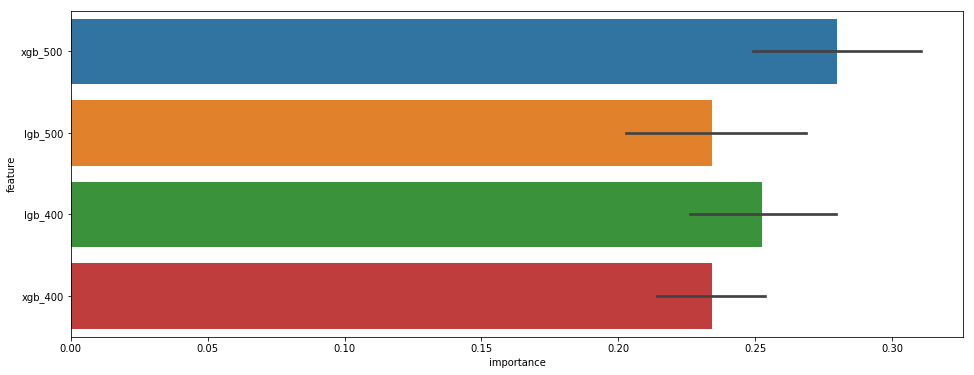

In [78]:
fig = plt.figure(figsize=(16, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_stack.sort_values(by='importance', ascending=False))
plt.show()

In [80]:
train_stack

,lgb_500,lgb_400,xgb_400,xgb_500
0,6.326066,5.251891,4.899118,4.935854
1,5.437608,4.655252,3.695216,5.047163
2,3.675957,3.265764,2.975672,3.522271
3,4.572775,5.287550,4.781065,4.253610
4,3.881295,5.233468,4.878295,4.237889
5,4.760027,5.166783,5.031924,4.924250
6,3.397550,4.055442,4.075199,3.711592
7,6.466832,6.434413,5.879005,5.791283
8,2.869696,2.088311,2.552599,2.533076
9,2.816110,2.475354,2.865791,2.881930
